<a href="https://colab.research.google.com/github/lovepreetmultani/NLP/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df=pd.read_csv("drive/My Drive/Datasets/finance_data.csv", encoding = "ISO-8859-1")

In [4]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [5]:
df.shape

(5842, 2)

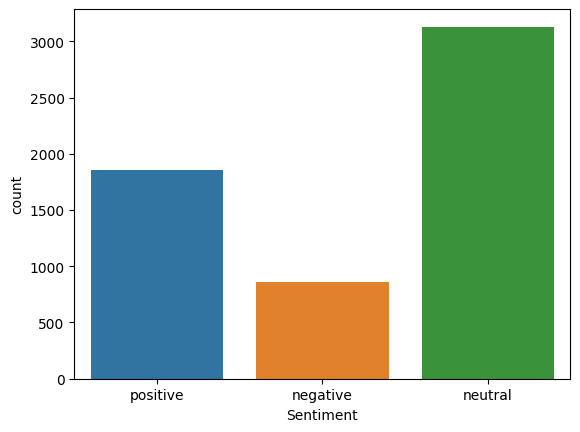

In [13]:
sns.countplot(x ='Sentiment', data = df)
plt.show()

Text(0.5, 0, 'Different categories')

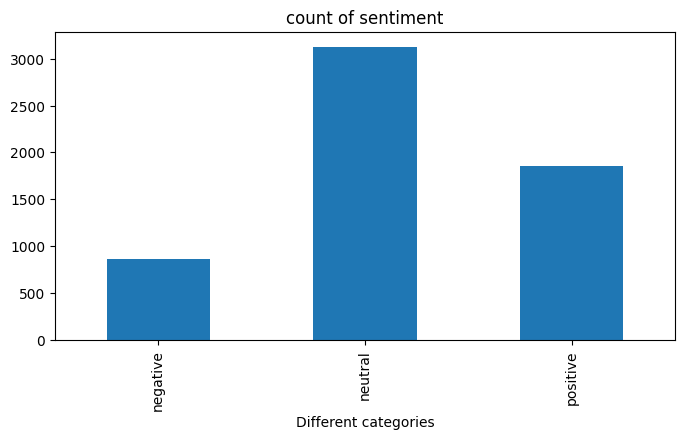

In [22]:
label = df['Sentiment'].value_counts().sort_index() \
.plot(kind='bar',
      title ='count of sentiment',
      figsize=(8,4))
label.set_xlabel('Different categories')

In [40]:
label_mapping = {'positive': 0, 'negative': 1, 'neutral': 2}

In [43]:
df['Sentiment'] = [label_mapping[label] for label in df['Sentiment']]

In [48]:
df=df.drop('sample',axis=1)

In [50]:
sia=SentimentIntensityAnalyzer()
df['compound']=df.Sentence.apply(lambda x: sia.polarity_scores(x)['compound'])
df['neu']=df.Sentence.apply(lambda x: sia.polarity_scores(x)['neu'])
df['pos']=df.Sentence.apply(lambda x: sia.polarity_scores(x)['pos'])
df['neg']=df.Sentence.apply(lambda x: sia.polarity_scores(x)['neg'])

In [51]:
df

,Sentence,Sentiment,compound,neu,pos,neg
0,The GeoSolutions technology will leverage Bene...,0,0.5423,0.847,0.153,0.000
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",1,-0.2023,0.833,0.000,0.167
2,"For the last quarter of 2010 , Componenta 's n...",0,0.1531,0.856,0.080,0.064
3,According to the Finnish-Russian Chamber of Co...,2,0.0000,1.000,0.000,0.000
4,The Swedish buyout firm has sold its remaining...,2,0.0000,1.000,0.000,0.000
...,...,...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,1,-0.5267,0.761,0.000,0.239
5838,Nordic Walking was first used as a summer trai...,2,0.0000,1.000,0.000,0.000
5839,"According shipping company Viking Line , the E...",2,0.2023,0.870,0.130,0.000
5840,"In the building and home improvement trade , s...",2,0.4588,0.824,0.176,0.000


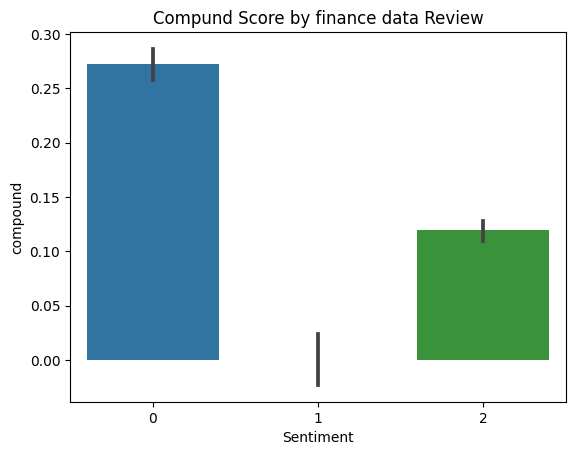

In [52]:
ax = sns.barplot(data=df, x='Sentiment', y='compound')
ax.set_title('Compund Score by finance data Review')
plt.show()

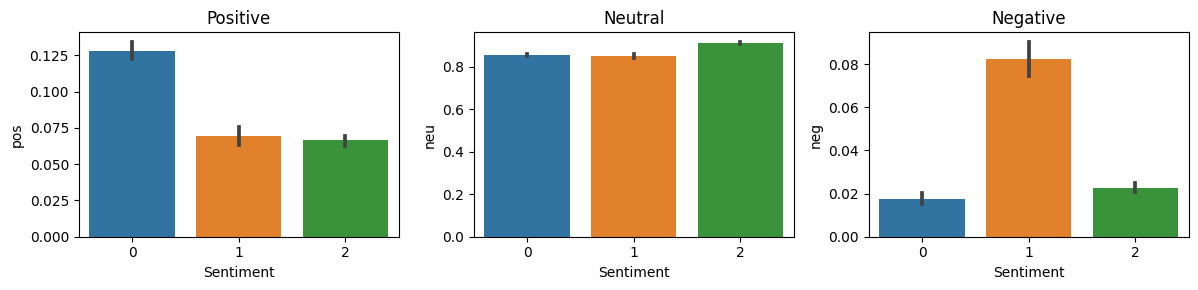

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=df, x='Sentiment', y='pos', ax=axs[0])
sns.barplot(data=df, x='Sentiment', y='neu', ax=axs[1])
sns.barplot(data=df, x='Sentiment', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [5]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [6]:
# Removing punctuations
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [7]:
# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index

In [8]:
# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()

In [9]:
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [11]:
## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

In [12]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,train['Label'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [13]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [15]:
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[138  48]
 [  8 184]]
0.8518518518518519
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       186
           1       0.79      0.96      0.87       192

    accuracy                           0.85       378
   macro avg       0.87      0.85      0.85       378
weighted avg       0.87      0.85      0.85       378

